In [1]:
# importing requierd libraries
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import f1_score,f1_score,confusion_matrix,classification_report,accuracy_score
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
Data = pd.read_csv(r"D:\Projects\8.Auto Insurance Claims\insurance_claims.csv",sep=',')
Data

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       2014-10-17           OH   
1                   228   42         342868       2006-06-27           IN   
2                   134   29         687698       2000-09-06           OH   
3                   256   41         227811       1990-05-25           IL   
4                   228   44         367455       2014-06-06           IL   
5                   256   39         104594       2006-10-12           OH   
6                   137   34         413978       2000-06-04           IN   
7                   165   37         429027       1990-02-03           IL   
8                    27   33         485665       1997-02-05           IL   
9                   212   42         636550       2011-07-25           IL   
10                  235   42         543610       2002-05-26           OH   
11                  447   61         214618       1999-05-29           OH   
12                   60   23         842643       1997-11-20           OH   
13                  121   34         626808       2012-10-26           OH   
14                  180   38         644081       1998-12-28           OH   
15                  473   58         892874       1992-10-19           IN   
16                   70   26         558938       2005-06-08           OH   
17                  140   31         275265       2004-11-15           IN   
18                  160   37         921202       2014-12-28           OH   
19                  196   39         143972       1992-08-02           IN   
20                  460   62         183430       2002-06-25           IN   
21                  217   41         431876       2005-11-27           IL   
22                  370   55         285496       1994-05-27           IL   
23                  413   55         115399       1991-02-08           IN   
24                  237   40         736882       1996-02-02           IN   
25                    8   35         699044       2013-12-05           OH   
26                  257   43         863236       1990-09-20           IN   
27                  202   34         608513       2002-07-18           IN   
28                  224   40         914088       1990-02-08           OH   
29                  241   45         596785       2014-03-04           IL   
..                  ...  ...            ...              ...          ...   
970                 213   35         844129       1990-09-20           OH   
971                  79   25         732169       2000-11-05           OH   
972                 232   44         221854       1994-10-03           OH   
973                 230   37         776950       2005-04-11           IL   
974                 234   41         291006       1990-05-16           IN   
975                 240   40         845751       2004-09-11           IN   
976                 143   33         889764       1993-11-30           OH   
977                 266   42         929306       2003-03-06           IN   
978                  89   32         515457       1996-12-18           IN   
979                 229   37         556270       1995-02-21           IN   
980                 245   40         908935       2009-12-11           IL   
981                  50   44         525862       2000-10-18           OH   
982                 230   43         490514       2007-02-09           IN   
983                  17   39         774895       2006-10-28           IL   
984                 163   36         974522       2000-01-27           IN   
985                  29   32         669809       2002-04-05           OH   
986                 232   42         182953       2013-04-30           IN   
987                 235   39         836349       2013-05-01           IL   
988                 295   46         591269       1999-01-09           IN   
989                  22   21         550127       2007-07-04           IN   
9

In [3]:
Data.describe(include='all')

months_as_customer          age  policy_number policy_bind_date  \
count          1000.000000  1000.000000    1000.000000             1000   
unique                 NaN          NaN            NaN              951   
top                    NaN          NaN            NaN       2006-01-01   
freq                   NaN          NaN            NaN                3   
mean            203.954000    38.948000  546238.648000              NaN   
std             115.113174     9.140287  257063.005276              NaN   
min               0.000000    19.000000  100804.000000              NaN   
25%             115.750000    32.000000  335980.250000              NaN   
50%             199.500000    38.000000  533135.000000              NaN   
75%             276.250000    44.000000  759099.750000              NaN   
max             479.000000    64.000000  999435.000000              NaN   

       policy_state policy_csl  policy_deductable  policy_annual_premium  \
count          1000       1000        1000.000000            1000.000000   
unique            3          3                NaN                    NaN   
top              OH    250/500                NaN                    NaN   
freq            352        351                NaN                    NaN   
mean            NaN        NaN        1136.000000            1256.406150   
std             NaN        NaN         611.864673             244.167395   
min             NaN        NaN         500.000000             433.330000   
25%             NaN        NaN         500.000000            1089.607500   
50%             NaN        NaN        1000.000000            1257.200000   
75%             NaN        NaN        2000.000000            1415.695000   
max             NaN        NaN        2000.000000            2047.590000   

        umbrella_limit    insured_zip ...  police_report_available  \
count     1.000000e+03    1000.000000 ...                     1000   
unique             NaN            NaN ...                        3   
top                NaN            NaN ...                       NO   
freq               NaN            NaN ...                      343   
mean      1.101000e+06  501214.488000 ...                      NaN   
std       2.297407e+06   71701.610941 ...                      NaN   
min      -1.000000e+06  430104.000000 ...                      NaN   
25%       0.000000e+00  448404.500000 ...                      NaN   
50%       0.000000e+00  466445.500000 ...                      NaN   
75%       0.000000e+00  603251.000000 ...                      NaN   
max       1.000000e+07  620962.000000 ...                      NaN   

       total_claim_amount  injury_claim property_claim vehicle_claim  \
count          1000.00000   1000.000000    1000.000000   1000.000000   
unique                NaN           NaN            NaN           NaN   
top                   NaN           NaN            NaN           NaN   
freq                  NaN           NaN            NaN           NaN   
mean          52761.94000   7433.420000    7399.570000  37928.950000   
std           26401.53319   4880.951853    4824.726179  18886.252893   
min             100.00000      0.000000       0.000000     70.000000   
25%           41812.50000   4295.000000    4445.000000  30292.500000   
50%           58055.00000   6775.000000    6750.000000  42100.000000   
75%           70592.50000  11305.000000   10885.000000  50822.500000   
max          114920.00000  21450.000000   23670.000000  79560.000000   

        auto_make  auto_model    auto_year fraud_reported _c39  
count        1000        1000  1000.000000           1000  0.0  
unique         14          39          NaN              2  NaN  
top         Dodge         RAM          NaN              N  NaN  
freq           80          43          NaN            753  NaN  
mean          NaN         NaN  2005.103000            NaN  NaN  
std           NaN         NaN     6.015861            NaN  NaN  
min           NaN         NaN  19

In [4]:
# Checing the data information.
# Checking wheather data is missing or not, data types, and coulmns name.
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

Here, Feature _c39 is null column,so we will drop it from the train data and also there is no other missing column present.

In [5]:
#Checking the shape of the data
Data.shape

(1000, 40)

In [6]:
# Checking the columns name
Data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
# Cheacking data types
Data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [8]:
# Cheacking numeric values
Data._get_numeric_data()

months_as_customer  age  policy_number  policy_deductable  \
0                   328   48         521585               1000   
1                   228   42         342868               2000   
2                   134   29         687698               2000   
3                   256   41         227811               2000   
4                   228   44         367455               1000   
5                   256   39         104594               1000   
6                   137   34         413978               1000   
7                   165   37         429027               1000   
8                    27   33         485665                500   
9                   212   42         636550                500   
10                  235   42         543610                500   
11                  447   61         214618               2000   
12                   60   23         842643                500   
13                  121   34         626808               1000   
14                  180   38         644081               2000   
15                  473   58         892874               2000   
16                   70   26         558938               1000   
17                  140   31         275265                500   
18                  160   37         921202                500   
19                  196   39         143972               2000   
20                  460   62         183430               1000   
21                  217   41         431876               2000   
22                  370   55         285496               2000   
23                  413   55         115399               2000   
24                  237   40         736882               1000   
25                    8   35         699044               2000   
26                  257   43         863236               2000   
27                  202   34         608513                500   
28                  224   40         914088               2000   
29                  241   45         596785               2000   
..                  ...  ...            ...                ...   
970                 213   35         844129                500   
971                  79   25         732169                500   
972                 232   44         221854               2000   
973                 230   37         776950               1000   
974                 234   41         291006                500   
975                 240   40         845751                500   
976                 143   33         889764               1000   
977                 266   42         929306                500   
978                  89   32         515457               1000   
979                 229   37         556270               1000   
980                 245   40         908935               1000   
981                  50   44         525862               2000   
982                 230   43         490514               2000   
983                  17   39         774895               1000   
984                 163   36         974522               1000   
985                  29   32         669809               1000   
986                 232   42         182953                500   
987                 235   39         836349               2000   
988                 295   46         591269                500   
989                  22   21         550127               1000   
990                 286   43         663190                500   
991                 257   44         109392               1000   
992                  94   26         215278                500   
993                 124   28         674570               1000   
994                 141   30         681486               1000   
995                   3   38         941851               1000   
996                 285   41         186934               1000   
997                 130   34         918516                500   
998                 458   62         533940  

In [9]:
# Checking numeric and categorical columns or variables
numCols = Data.select_dtypes("number").columns
catCols = Data.select_dtypes("object").columns
numCols= list(set(numCols))
catCols= list(set(catCols))

In [10]:
numCols

['vehicle_claim',
 'total_claim_amount',
 'umbrella_limit',
 'insured_zip',
 'capital-loss',
 'incident_hour_of_the_day',
 'bodily_injuries',
 'property_claim',
 'witnesses',
 'months_as_customer',
 'policy_annual_premium',
 'injury_claim',
 '_c39',
 'policy_number',
 'number_of_vehicles_involved',
 'age',
 'policy_deductable',
 'capital-gains',
 'auto_year']

In [11]:
catCols

['insured_education_level',
 'insured_relationship',
 'insured_hobbies',
 'incident_city',
 'incident_state',
 'incident_date',
 'policy_bind_date',
 'insured_sex',
 'auto_make',
 'incident_severity',
 'collision_type',
 'policy_csl',
 'insured_occupation',
 'incident_location',
 'incident_type',
 'auto_model',
 'police_report_available',
 'policy_state',
 'authorities_contacted',
 'fraud_reported',
 'property_damage']

In [12]:
Data.describe(include='all').loc['unique', :]

months_as_customer              NaN
age                             NaN
policy_number                   NaN
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable               NaN
policy_annual_premium           NaN
umbrella_limit                  NaN
insured_zip                     NaN
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   NaN
capital-loss                    NaN
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day        NaN
number_of_vehicles_involved     NaN
property_damage             

In [13]:
# Get a series object containing the count of unique elements
# in each column of dataframe
uniqueValues = Data.nunique()
uniqueValues

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

Check Missing Values

In [14]:
# only want to know if there are any missing values
Data.isnull().values.any()

True

In [15]:
# knowling number of non-missing values for each variable
Data.notnull().sum()

months_as_customer             1000
age                            1000
policy_number                  1000
policy_bind_date               1000
policy_state                   1000
policy_csl                     1000
policy_deductable              1000
policy_annual_premium          1000
umbrella_limit                 1000
insured_zip                    1000
insured_sex                    1000
insured_education_level        1000
insured_occupation             1000
insured_hobbies                1000
insured_relationship           1000
capital-gains                  1000
capital-loss                   1000
incident_date                  1000
incident_type                  1000
collision_type                 1000
incident_severity              1000
authorities_contacted          1000
incident_state                 1000
incident_city                  1000
incident_location              1000
incident_hour_of_the_day       1000
number_of_vehicles_involved    1000
property_damage             

In [16]:
# Count total NaN at each column in DataFrame
Data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Class Imbalance 

Text(0.5, 0, 'Target class')

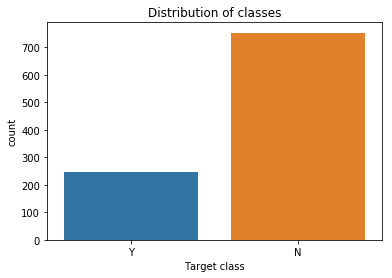

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.countplot(x=Data['fraud_reported'])
plt.title('Distribution of classes')
plt.xlabel('Target class')

In [18]:
Data.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

## Data Cleaning 

In [19]:
Data.shape

(1000, 40)

In [20]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [21]:
Data.drop('_c39',axis=1,inplace=True)

In [22]:
Data.shape

(1000, 39)

In [23]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [24]:
Data.policy_bind_date.unique()

array(['2014-10-17', '2006-06-27', '2000-09-06', '1990-05-25',
       '2014-06-06', '2006-10-12', '2000-06-04', '1990-02-03',
       '1997-02-05', '2011-07-25', '2002-05-26', '1999-05-29',
       '1997-11-20', '2012-10-26', '1998-12-28', '1992-10-19',
       '2005-06-08', '2004-11-15', '2014-12-28', '1992-08-02',
       '2002-06-25', '2005-11-27', '1994-05-27', '1991-02-08',
       '1996-02-02', '2013-12-05', '1990-09-20', '2002-07-18',
       '1990-02-08', '2014-03-04', '2000-02-18', '2008-06-19',
       '2003-08-01', '1992-04-04', '1991-01-13', '2010-08-08',
       '2003-03-09', '1993-02-03', '2002-11-25', '1997-07-27',
       '1995-05-08', '2012-08-30', '2006-04-30', '2003-04-13',
       '2007-12-05', '2006-08-21', '1990-01-08', '1990-03-18',
       '2008-01-07', '1997-03-10', '2004-01-10', '1994-08-20',
       '2002-06-02', '1994-04-28', '2014-08-17', '2007-08-11',
       '2008-11-20', '1995-10-18', '1993-05-19', '2005-02-26',
       '1990-02-14', '1993-09-30', '2014-06-10', '2008-

In [25]:
Data['policy_bind_date']

0      2014-10-17
1      2006-06-27
2      2000-09-06
3      1990-05-25
4      2014-06-06
5      2006-10-12
6      2000-06-04
7      1990-02-03
8      1997-02-05
9      2011-07-25
10     2002-05-26
11     1999-05-29
12     1997-11-20
13     2012-10-26
14     1998-12-28
15     1992-10-19
16     2005-06-08
17     2004-11-15
18     2014-12-28
19     1992-08-02
20     2002-06-25
21     2005-11-27
22     1994-05-27
23     1991-02-08
24     1996-02-02
25     2013-12-05
26     1990-09-20
27     2002-07-18
28     1990-02-08
29     2014-03-04
          ...    
970    1990-09-20
971    2000-11-05
972    1994-10-03
973    2005-04-11
974    1990-05-16
975    2004-09-11
976    1993-11-30
977    2003-03-06
978    1996-12-18
979    1995-02-21
980    2009-12-11
981    2000-10-18
982    2007-02-09
983    2006-10-28
984    2000-01-27
985    2002-04-05
986    2013-04-30
987    2013-05-01
988    1999-01-09
989    2007-07-04
990    1994-02-05
991    2006-07-12
992    2007-10-24
993    2001-12-08
994    200

In [26]:
#extract out the year as 

Data['policy_bind_year']=Data['policy_bind_date'].str.extract('(\d{4})\-').astype('int32')
Data['policy_bind_year']

0      2014
1      2006
2      2000
3      1990
4      2014
5      2006
6      2000
7      1990
8      1997
9      2011
10     2002
11     1999
12     1997
13     2012
14     1998
15     1992
16     2005
17     2004
18     2014
19     1992
20     2002
21     2005
22     1994
23     1991
24     1996
25     2013
26     1990
27     2002
28     1990
29     2014
       ... 
970    1990
971    2000
972    1994
973    2005
974    1990
975    2004
976    1993
977    2003
978    1996
979    1995
980    2009
981    2000
982    2007
983    2006
984    2000
985    2002
986    2013
987    2013
988    1999
989    2007
990    1994
991    2006
992    2007
993    2001
994    2007
995    1991
996    2014
997    2003
998    2011
999    1996
Name: policy_bind_year, Length: 1000, dtype: int32

In [27]:
Data['incident_date']

0      2015-01-25
1      2015-01-21
2      2015-02-22
3      2015-01-10
4      2015-02-17
5      2015-01-02
6      2015-01-13
7      2015-02-27
8      2015-01-30
9      2015-01-05
10     2015-01-06
11     2015-02-15
12     2015-01-22
13     2015-01-08
14     2015-01-15
15     2015-01-29
16     2015-02-22
17     2015-01-06
18     2015-01-19
19     2015-02-22
20     2015-01-01
21     2015-02-10
22     2015-01-11
23     2015-01-19
24     2015-02-24
25     2015-01-09
26     2015-01-28
27     2015-01-07
28     2015-01-08
29     2015-02-15
          ...    
970    2015-01-22
971    2015-02-13
972    2015-02-08
973    2015-01-09
974    2015-02-08
975    2015-01-10
976    2015-01-26
977    2015-02-21
978    2015-01-23
979    2015-02-05
980    2015-02-15
981    2015-01-08
982    2015-01-01
983    2015-02-26
984    2015-02-28
985    2015-01-13
986    2015-02-19
987    2015-01-13
988    2015-02-17
989    2015-02-15
990    2015-01-31
991    2015-02-06
992    2015-01-23
993    2015-02-17
994    201

In [28]:
#extract the month out 
#all accidents are from 2015 jan and feb, so year isnt very important

Data['incident_month']=Data['incident_date'].str.extract('\d{4}\-(\d{2})').astype('int32')
Data['incident_month']

0      1
1      1
2      2
3      1
4      2
5      1
6      1
7      2
8      1
9      1
10     1
11     2
12     1
13     1
14     1
15     1
16     2
17     1
18     1
19     2
20     1
21     2
22     1
23     1
24     2
25     1
26     1
27     1
28     1
29     2
      ..
970    1
971    2
972    2
973    1
974    2
975    1
976    1
977    2
978    1
979    2
980    2
981    1
982    1
983    2
984    2
985    1
986    2
987    1
988    2
989    2
990    1
991    2
992    1
993    2
994    1
995    2
996    1
997    1
998    2
999    2
Name: incident_month, Length: 1000, dtype: int32

In [29]:
Data['collision_type']

0       Side Collision
1                    ?
2       Rear Collision
3      Front Collision
4                    ?
5       Rear Collision
6      Front Collision
7      Front Collision
8      Front Collision
9       Rear Collision
10     Front Collision
11     Front Collision
12      Rear Collision
13                   ?
14      Rear Collision
15      Side Collision
16      Rear Collision
17      Side Collision
18      Side Collision
19      Side Collision
20      Rear Collision
21      Side Collision
22      Rear Collision
23     Front Collision
24      Rear Collision
25      Rear Collision
26                   ?
27                   ?
28      Side Collision
29      Rear Collision
            ...       
970     Side Collision
971    Front Collision
972     Rear Collision
973     Rear Collision
974     Side Collision
975     Rear Collision
976     Side Collision
977     Side Collision
978    Front Collision
979     Rear Collision
980     Rear Collision
981    Front Collision
982    Fron

In [30]:
Data.collision_type.unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [31]:
# So replace "?" with undocumented 

Data['collision_type'] = Data['collision_type'].replace("?", "undocumented")

In [32]:
Data.collision_type.unique()

array(['Side Collision', 'undocumented', 'Rear Collision',
       'Front Collision'], dtype=object)

In [33]:
Data.police_report_available.unique()

array(['YES', '?', 'NO'], dtype=object)

In [34]:
Data['police_report_available'] = Data['police_report_available'].replace("?", "undocumented")

In [35]:
Data.police_report_available.unique()

array(['YES', 'undocumented', 'NO'], dtype=object)

In [36]:
Data.property_damage.unique()

array(['YES', '?', 'NO'], dtype=object)

In [37]:
Data['property_damage'] = Data['property_damage'].replace("?", "undocumented")

In [38]:
Data.property_damage.unique()

array(['YES', 'undocumented', 'NO'], dtype=object)

In [39]:
Data.auto_make.unique()

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

In [40]:
Data['auto_make'] = Data['auto_make'].replace("Suburu", "Subaru")

In [41]:
Data.auto_make.unique()

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Subaru', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

In [42]:
def levels(Data):
    return (pd.DataFrame({'dtype':Data.dtypes, 
                         'levels':Data.nunique(), 
                         'uni_values':[Data[x].unique() for x in Data.columns],
                         'null_values':Data.isna().sum(),
                         'unique':Data.nunique()}))
levels(Data)

dtype  levels  \
months_as_customer             int64     391   
age                            int64      46   
policy_number                  int64    1000   
policy_bind_date              object     951   
policy_state                  object       3   
policy_csl                    object       3   
policy_deductable              int64       3   
policy_annual_premium        float64     991   
umbrella_limit                 int64      11   
insured_zip                    int64     995   
insured_sex                   object       2   
insured_education_level       object       7   
insured_occupation            object      14   
insured_hobbies               object      20   
insured_relationship          object       6   
capital-gains                  int64     338   
capital-loss                   int64     354   
incident_date                 object      60   
incident_type                 object       4   
collision_type                object       4   
incident_severity             object       4   
authorities_contacted         object       5   
incident_state                object       7   
incident_city                 object       7   
incident_location             object    1000   
incident_hour_of_the_day       int64      24   
number_of_vehicles_involved    int64       4   
property_damage               object       3   
bodily_injuries                int64       3   
witnesses                      int64       4   
police_report_available       object       3   
total_claim_amount             int64     763   
injury_claim                   int64     638   
property_claim                 int64     626   
vehicle_claim                  int64     726   
auto_make                     object      14   
auto_model                    object      39   
auto_year                      int64      21   
fraud_reported                object       2   
policy_bind_year               int32      26   
incident_month                 int32       3   

                                                                    uni_values  \
months_as_customer           [328, 228, 134, 256, 137, 165, 27, 212, 235, 4...   
age                          [48, 42, 29, 41, 44, 39, 34, 37, 33, 61, 23, 3...   
policy_number                [521585, 342868, 687698, 227811, 367455, 10459...   
policy_bind_date             [2014-10-17, 2006-06-27, 2000-09-06, 1990-05-2...   
policy_state                                                      [OH, IN, IL]   
policy_csl                                        [250/500, 100/300, 500/1000]   
policy_deductable                                            [1000, 2000, 500]   
policy_annual_premium        [1406.91, 1197.22, 1413.14, 1415.74, 1583.91, ...   
umbrella_limit               [0, 5000000, 6000000, 4000000, 3000000, 800000...   
insured_zip                  [466132, 468176, 430632, 608117, 610706, 47845...   
insured_sex                                                     [MALE, FEMALE]   
insured_education_level      [MD, PhD, Associate, Masters, High School, Col...   
insured_occupation           [craft-repair, machine-op-inspct, sales, armed...   
insured_hobbies              [sleeping, reading, board-games, bungie-jumpin...   
insured_relationship         [husband, other-relative, own-child, unmarried...   
capital-gains                [53300, 0, 35100, 48900, 66000, 38400, 52800, ...   
capital-loss                 [0, -62400, -46000, -77000, -39300, -51000, -3...   
incident_date                [2015-01-25, 2015-01-21, 2015-02-22, 2015-01-1...   
incident_type                [Single Vehicle Collision, Vehicle Theft, Mult...   
collision_type               [Side Collision, undocumented, Rear Collision,...   
incident_severity            [Major Damage, Minor Damage, Total Loss, Trivi...   
authorities_contacted                   [Police, None, Fire, Other, Ambulance]   
incident_state                                    [SC, VA, NY, OH, WV, NC, PA]   
incident_city                [Columbus, Riverw

In [43]:
for col in Data.columns:
    print(Data[col].value_counts())
    print()

194    8
285    7
140    7
230    7
128    7
254    7
101    7
210    7
156    6
239    6
245    6
289    6
246    6
61     6
255    6
257    6
65     6
147    6
259    6
290    6
222    6
107    6
295    6
163    6
126    6
134    5
108    5
266    5
103    5
269    5
      ..
394    1
392    1
390    1
82     1
83     1
389    1
386    1
385    1
381    1
379    1
90     1
377    1
92     1
375    1
373    1
372    1
183    1
366    1
364    1
100    1
359    1
355    1
354    1
352    1
109    1
347    1
113    1
337    1
117    1
0      1
Name: months_as_customer, Length: 391, dtype: int64

43    49
39    48
41    45
34    44
30    42
31    42
38    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
36    32
42    32
44    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
25    14
49    14
55    14
50    13
53    13
61    10
24    10
54    10
60     9
51     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
22     1
20

In [44]:
Columns_float  = Data.select_dtypes(include=['float64']).columns
Columns_int    = Data.select_dtypes(include=['int64']).columns
Columns_object = Data.select_dtypes(include=['object']).columns

# print("Nominale/Ordinale")
# for col in Columns_object:
#     Data[col].value_counts().plot(kind='pie', title=col, figsize=(15,5))
#     plt.show()

# print("Discret-Kardinale Merkmale")
# for col in Columns_int:
#     Data[col].plot(kind='hist', title=col, figsize=(15,5))
#     plt.show()

# print("Kontinuierlich-Kardinale Merkmale")
# for col in Columns_float:
#     Data[col].plot(kind='kde', title=col, figsize=(15,5))
#     plt.show()

In [45]:
print('Total Columns_float data type :-',len(Columns_float))
Columns_float

Total Columns_float data type :- 1


Index(['policy_annual_premium'], dtype='object')

In [46]:
print('Total Columns_int data type :-',len(Columns_int))
Columns_int

Total Columns_int data type :- 17


Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_year'],
      dtype='object')

In [47]:
print('Total Columns_object data type :-',len(Columns_object))
Columns_object

Total Columns_object data type :- 21


Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [48]:
categorical = ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported']
numerical = ['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_year','policy_annual_premium']


## EDA

### Pair Plot

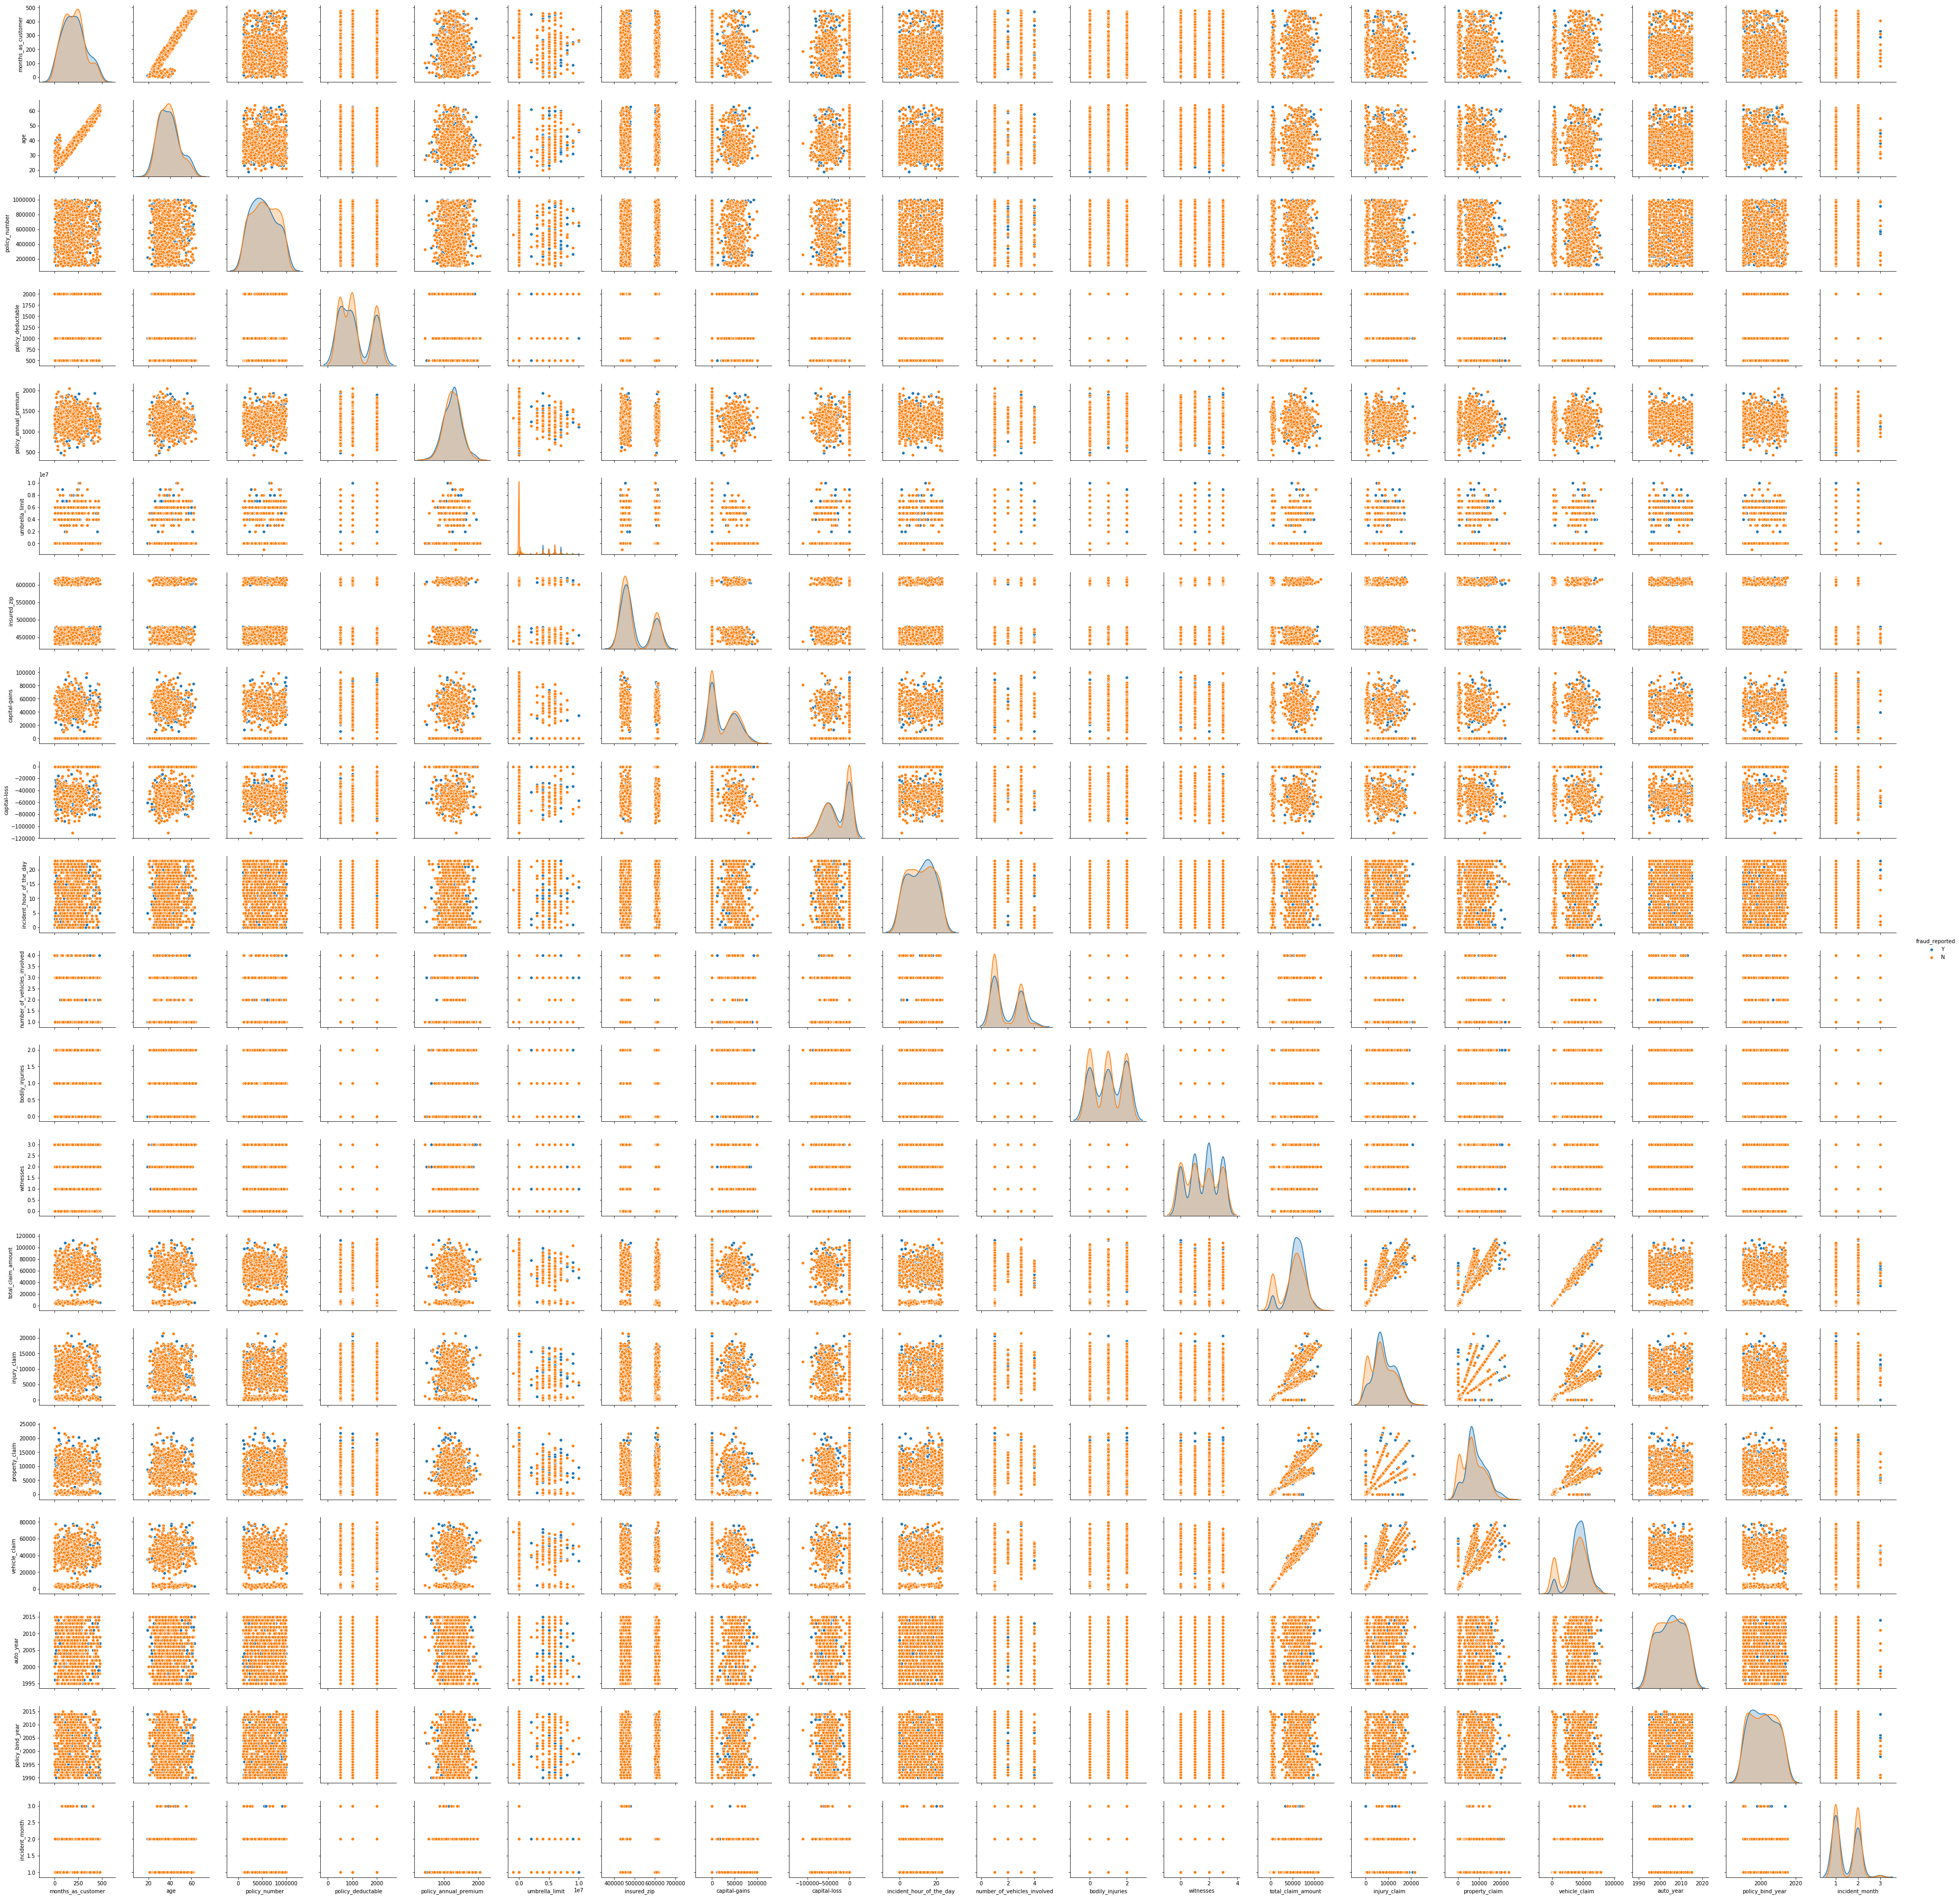

In [49]:
#data.drop('age_group', axis=1, inplace=True)
sns.pairplot(Data, hue='fraud_reported')

### Correlation matrix of numerical features

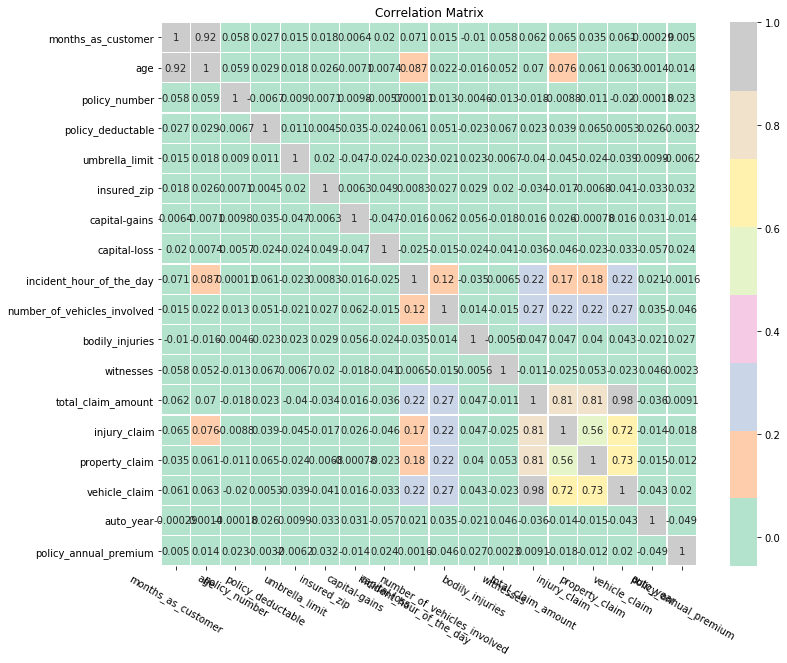

In [50]:
corr_data = Data[numerical + ['fraud_reported']]
corr = corr_data.corr()
plt.close()
cor_plot = sns.heatmap(corr,annot=True,cmap='Pastel2',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

- Total_claim_amount,injuiry_claim,property claim and vehicle_claim having the high correlation.
- Over numerical features have very less correlation between them.
- 


In [51]:
categorical

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [52]:
# Data

Feature ranking:
1. feature 13 (0.380462)
2. feature 20 (0.376502)
3. feature 24 (0.043616)
4. feature 9 (0.026928)
5. feature 25 (0.024473)
6. feature 2 (0.020873)
7. feature 34 (0.018618)
8. feature 17 (0.017601)
9. feature 11 (0.016872)
10. feature 5 (0.014176)
11. feature 12 (0.013230)
12. feature 35 (0.012796)
13. feature 31 (0.011982)
14. feature 32 (0.007911)
15. feature 30 (0.003128)
16. feature 36 (0.003037)
17. feature 21 (0.002995)
18. feature 37 (0.002622)
19. feature 16 (0.002176)
20. feature 19 (0.000000)
21. feature 7 (0.000000)
22. feature 3 (0.000000)
23. feature 1 (0.000000)
24. feature 8 (0.000000)
25. feature 6 (0.000000)
26. feature 4 (0.000000)
27. feature 10 (0.000000)
28. feature 39 (0.000000)
29. feature 14 (0.000000)
30. feature 15 (0.000000)
31. feature 18 (0.000000)
32. feature 38 (0.000000)
33. feature 22 (0.000000)
34. feature 23 (0.000000)
35. feature 26 (0.000000)
36. feature 27 (0.000000)
37. feature 28 (0.000000)
38. feature 29 (0.000000)
39. feature 3

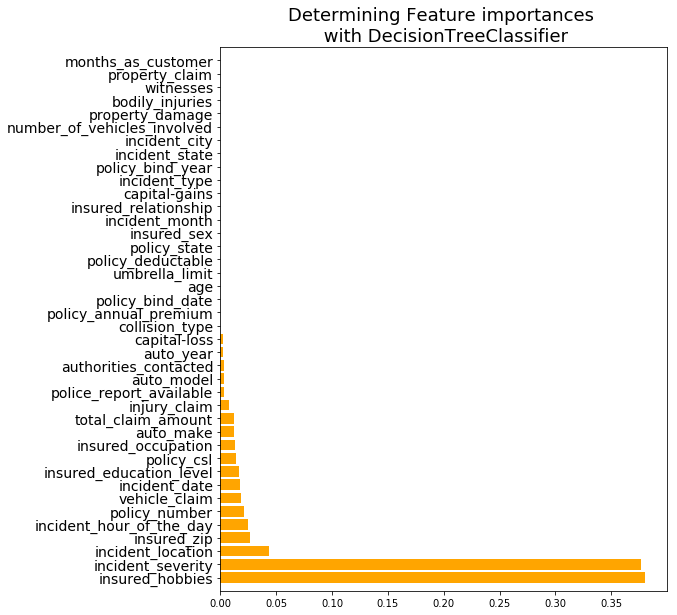

In [53]:
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV, GridSearchCV
# Convert the columns into categorical variables
data1 = Data.copy()
data1['policy_bind_date'] = data1['policy_bind_date'].astype('category').cat.codes
data1['policy_state'] = data1['policy_state'].astype('category').cat.codes
data1['policy_csl'] = data1['policy_csl'].astype('category').cat.codes
data1['insured_sex'] = data1['insured_sex'].astype('category').cat.codes
data1['insured_education_level'] = data1['insured_education_level'].astype('category').cat.codes
data1['insured_occupation'] = data1['insured_occupation'].astype('category').cat.codes
data1['insured_hobbies'] = data1['insured_hobbies'].astype('category').cat.codes
data1['insured_relationship'] = data1['insured_relationship'].astype('category').cat.codes
data1['incident_date'] = data1['incident_date'].astype('category').cat.codes
data1['incident_type'] = data1['incident_type'].astype('category').cat.codes
data1['collision_type'] = data1['collision_type'].astype('category').cat.codes
data1['incident_severity'] = data1['incident_severity'].astype('category').cat.codes
data1['authorities_contacted'] = data1['authorities_contacted'].astype('category').cat.codes
data1['incident_state'] = data1['incident_state'].astype('category').cat.codes
data1['incident_city'] = data1['incident_city'].astype('category').cat.codes
data1['incident_location'] = data1['incident_location'].astype('category').cat.codes
data1['property_damage'] = data1['property_damage'].astype('category').cat.codes
data1['police_report_available'] = data1['police_report_available'].astype('category').cat.codes
data1['auto_make'] = data1['auto_make'].astype('category').cat.codes
data1['auto_model'] = data1['auto_model'].astype('category').cat.codes



# Let's create new splittings like before but now we modified the data so we need to do it one more time.
# Create train and test splits
target_name = 'fraud_reported'
X = data1.drop('fraud_reported', axis=1)


label=data1[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,label,test_size=0.2, random_state=42, stratify=label)

# Build a classification task using 3 informative features
tree = tree.DecisionTreeClassifier(class_weight='balanced',min_weight_fraction_leaf = 0.01)

tree = tree.fit(X_train, y_train)
importances = tree.feature_importances_
feature_names = data1.drop('fraud_reported', axis=1).columns
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(8,10))
    plt.title("Determining Feature importances \n with DecisionTreeClassifier", fontsize=18)
    plt.barh(range(len(indices)), importances[indices], color='orange',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
#     plt.axhline(y=1.85, xmin=0.21, xmax=0.952, color='k', linewidth=3, linestyle='--')
#     plt.text(0.30, 2.8, '46% Difference between \n duration and contacts', color='k', fontsize=15)
    
feature_importance_graph(indices, importances, feature_names)
plt.show()

In [54]:
Importance_Feature = ['insured_hobbies','incident_severity','incident_location','insured_zip','insured_zip','insured_occupation','policy_number','vehicle_claim','insured_education_level','incident_hour_of_the_day','incident_date','policy_csl','auto_make','total_claim_amount','injury_claim','police_report_available','auto_model','months_as_customer','authorities_contacted','auto_year','policy_annual_premium']
Importance_Feature

['insured_hobbies',
 'incident_severity',
 'incident_location',
 'insured_zip',
 'insured_zip',
 'insured_occupation',
 'policy_number',
 'vehicle_claim',
 'insured_education_level',
 'incident_hour_of_the_day',
 'incident_date',
 'policy_csl',
 'auto_make',
 'total_claim_amount',
 'injury_claim',
 'police_report_available',
 'auto_model',
 'months_as_customer',
 'authorities_contacted',
 'auto_year',
 'policy_annual_premium']

In [55]:
len(Importance_Feature)

21

### insured_hobbies

Text(0.5, 1.0, 'Count Plot of job for target variable')

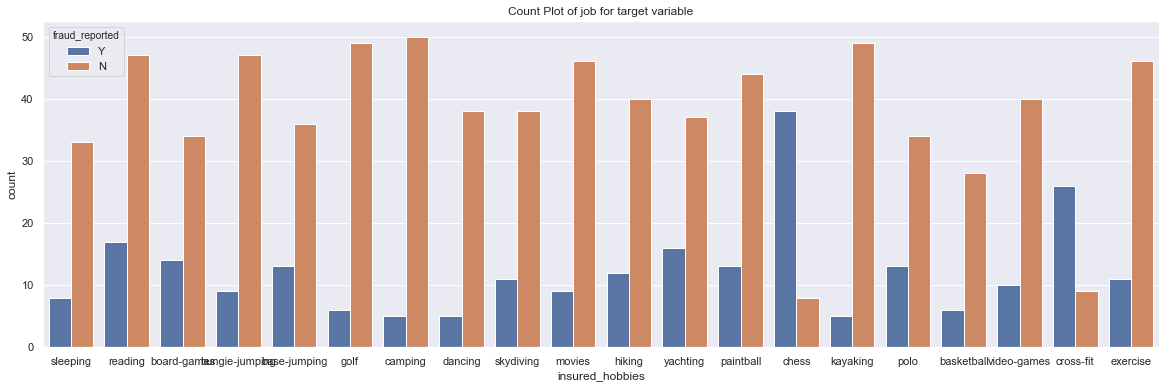

In [56]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x=Data['insured_hobbies'], data=Data, hue=Data['fraud_reported'])
plt.title('Count Plot of job for target variable')

In [57]:
Data.insured_hobbies.describe()

count        1000
unique         20
top       reading
freq           64
Name: insured_hobbies, dtype: object

### incident_severity

Text(0.5, 1.0, 'Count Plot of job for target variable')

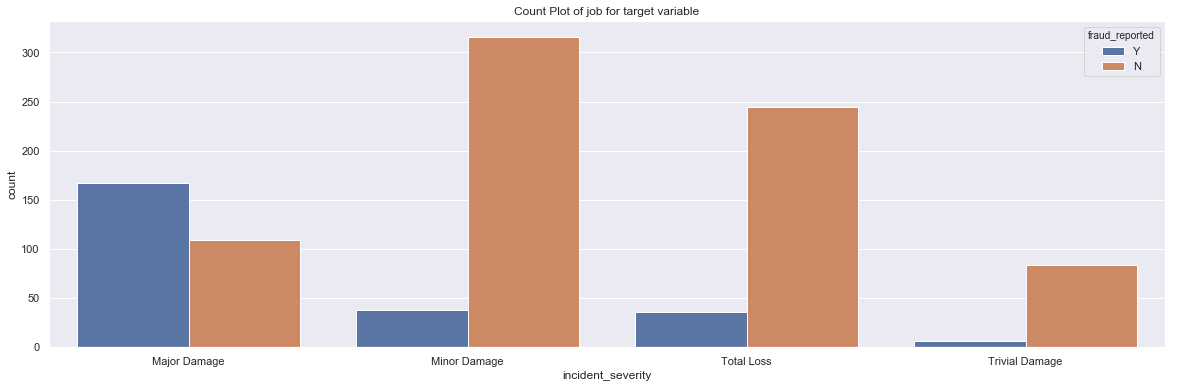

In [58]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x=Data['incident_severity'], data=Data, hue=Data['fraud_reported'])
plt.title('Count Plot of job for target variable')

In [59]:
Data.incident_severity.describe()

count             1000
unique               4
top       Minor Damage
freq               354
Name: incident_severity, dtype: object

<h4> <font color='#87CEEB  '>Train Test Split </h4>

In [99]:
Data.replace(to_replace={'fraud_reported':'Y'}, value=1, inplace=True)
Data.replace(to_replace={'fraud_reported':'N'}, value=0, inplace=True)

In [100]:
# split the data set into train and test
y = Data['fraud_reported']
x_train, x_test, y_train, y_test = train_test_split(Data.drop(['fraud_reported'], axis=1), y, test_size=0.20, random_state=42)

#x_train, x_test, y_train, y_test = train_test_split(data,y,stratify = y,random_state=42, test_size=0.2)

In [101]:
print('Train data shape {} {}'.format(x_train.shape, y_train.shape))
print('Test data shape {} {}'.format(x_test.shape, y_test.shape))

Train data shape (800, 40) (800,)
Test data shape (200, 40) (200,)


<h3><font color='#87CEEB  '> Encoding categories </h3></font>

In [102]:
from sklearn.feature_extraction.text import CountVectorizer

In [103]:
vectorizer = CountVectorizer(vocabulary=x_train.insured_hobbies.unique())
x_train_insured_hobbies = vectorizer.fit_transform(x_train.insured_hobbies)
x_test_insured_hobbies = vectorizer.transform(x_test.insured_hobbies)

vectorizer = CountVectorizer(vocabulary=x_train.incident_severity.unique())
x_train_incident_severity = vectorizer.fit_transform(x_train.incident_severity)
x_test_incident_severity = vectorizer.transform(x_test.incident_severity)

vectorizer = CountVectorizer(vocabulary=x_train.incident_location.unique())
x_train_incident_location = vectorizer.fit_transform(x_train.incident_location)
x_test_incident_location = vectorizer.transform(x_test.incident_location)

vectorizer = CountVectorizer(vocabulary=x_train.insured_occupation.unique())
x_train_insured_occupation = vectorizer.fit_transform(x_train.insured_occupation)
x_test_insured_occupation = vectorizer.transform(x_test.insured_occupation)

vectorizer = CountVectorizer(vocabulary=x_train.insured_education_level.unique())
x_train_insured_education_level = vectorizer.fit_transform(x_train.insured_education_level)
x_test_insured_education_level = vectorizer.transform(x_test.insured_education_level)

vectorizer = CountVectorizer(vocabulary=x_train.incident_date.unique())
x_train_incident_date = vectorizer.fit_transform(x_train.incident_date)
x_test_incident_date = vectorizer.transform(x_test.incident_date)

vectorizer = CountVectorizer(vocabulary=x_train.policy_csl.unique())
x_train_policy_csl = vectorizer.fit_transform(x_train.policy_csl)
x_test_policy_csl = vectorizer.transform(x_test.policy_csl)

vectorizer = CountVectorizer(vocabulary=x_train.auto_make.unique())
x_train_auto_make = vectorizer.fit_transform(x_train.auto_make)
x_test_auto_make = vectorizer.transform(x_test.auto_make)

vectorizer = CountVectorizer(vocabulary=x_train.police_report_available.unique())
x_train_police_report_available = vectorizer.fit_transform(x_train.police_report_available)
x_test_police_report_available = vectorizer.transform(x_test.police_report_available)

vectorizer = CountVectorizer(vocabulary=x_train.auto_model.unique())
x_train_auto_model = vectorizer.fit_transform(x_train.auto_model)
x_test_auto_model = vectorizer.transform(x_test.auto_model)

vectorizer = CountVectorizer(vocabulary=x_train.authorities_contacted.unique())
x_train_authorities_contacted = vectorizer.fit_transform(x_train.authorities_contacted)
x_test_authorities_contacted = vectorizer.transform(x_test.authorities_contacted)


<h3> <font color='#87CEEB'>Encoding Numerical data using StandardScaler() </h3></font>

In [104]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_insured_zip = sc.fit_transform(x_train['insured_zip'].values.reshape(-1,1))
x_test_insured_zip = sc.transform (x_test['insured_zip'].values.reshape(-1,1))

sc = StandardScaler()
x_train_policy_number = sc.fit_transform(x_train['policy_number'].values.reshape(-1,1))
x_test_policy_number = sc.transform (x_test['policy_number'].values.reshape(-1,1))

sc = StandardScaler()
x_train_vehicle_claim = sc.fit_transform(x_train['vehicle_claim'].values.reshape(-1,1))
x_test_vehicle_claim = sc.transform (x_test['vehicle_claim'].values.reshape(-1,1))

sc = StandardScaler()
x_train_incident_hour_of_the_day = sc.fit_transform(x_train['incident_hour_of_the_day'].values.reshape(-1,1))
x_test_incident_hour_of_the_day  = sc.transform (x_test['incident_hour_of_the_day'].values.reshape(-1,1))

sc = StandardScaler()
x_train_total_claim_amount = sc.fit_transform(x_train['total_claim_amount'].values.reshape(-1,1))
x_test_total_claim_amount  = sc.transform (x_test['total_claim_amount'].values.reshape(-1,1))

sc = StandardScaler()
x_train_injury_claim = sc.fit_transform(x_train['injury_claim'].values.reshape(-1,1))
x_test_injury_claim  = sc.transform (x_test['injury_claim'].values.reshape(-1,1))

sc = StandardScaler()
x_train_months_as_customer = sc.fit_transform(x_train['months_as_customer'].values.reshape(-1,1))
x_test_months_as_customer  = sc.transform (x_test['months_as_customer'].values.reshape(-1,1))

sc = StandardScaler()
x_train_auto_year = sc.fit_transform(x_train['auto_year'].values.reshape(-1,1))
x_test_auto_year  = sc.transform (x_test['auto_year'].values.reshape(-1,1))

sc = StandardScaler()
x_train_policy_annual_premium = sc.fit_transform(x_train['policy_annual_premium'].values.reshape(-1,1))
x_test_policy_annual_premium  = sc.transform (x_test['policy_annual_premium'].values.reshape(-1,1))


In [105]:
from scipy.sparse import hstack

train = hstack((x_train_insured_hobbies,
x_train_incident_severity,
x_train_incident_location,
x_train_insured_occupation,
x_train_insured_education_level,
x_train_incident_date,
x_train_policy_csl,
x_train_auto_make,
x_train_police_report_available,
x_train_auto_model,
x_train_authorities_contacted,

x_train_insured_zip,
x_train_policy_number,
x_train_vehicle_claim,
x_train_incident_hour_of_the_day,
x_train_total_claim_amount,
x_train_injury_claim,
x_train_months_as_customer,
x_train_auto_year,
x_train_policy_annual_premium)).tocsr()

test = hstack((x_test_insured_hobbies,
x_test_incident_severity,
x_test_incident_location,
x_test_insured_occupation,
x_test_insured_education_level,
x_test_incident_date,
x_test_policy_csl,
x_test_auto_make,
x_test_police_report_available,
x_test_auto_model,
x_test_authorities_contacted,

x_test_insured_zip,
x_test_policy_number,
x_test_vehicle_claim,
x_test_incident_hour_of_the_day,
x_test_total_claim_amount,
x_test_injury_claim,
x_test_months_as_customer,
x_test_auto_year,
x_test_policy_annual_premium)).tocsr()

In [106]:
import scipy.sparse as sp 
a = sp.csr_matrix(train) 
b = sp.csr_matrix(test) 
X = sp.vstack((a,b))

## <font color='#4682B4'>  Machine Learning Models </h2></font>

In [107]:
# dictionary to store accuracy and roc score for each model
score = {}

<h3> Logistic Regression </h3>

<h4> Hyperparameter tuning Logistic Regression</h4>

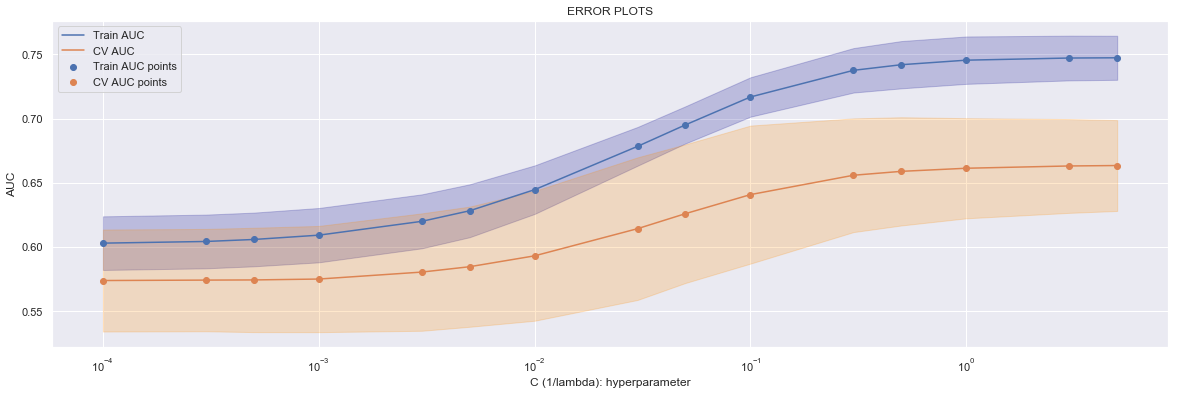

Best parameters:  {'C': 5}


In [108]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
model_LR = LogisticRegression(class_weight='balanced')
C= [(10**i)*x for i in range(-4, 1) for x in [1,3,5]]#C=1/lambda
parameters = {'C': [(10**i)*x for i in range(-4, 1) for x in [1,3,5]]}

clf_LR = GridSearchCV(model_LR, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf_LR.fit(train, y_train)

train_auc= clf_LR.cv_results_['mean_train_score']
train_auc_std= clf_LR.cv_results_['std_train_score']
cv_auc = clf_LR.cv_results_['mean_test_score'] 
cv_auc_std= clf_LR.cv_results_['std_test_score']

plt.plot(C, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(C,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(C, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(C,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("C (1/lambda): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")

plt.scatter(C, train_auc, label='Train AUC points')
plt.scatter(C, cv_auc, label='CV AUC points')
plt.xscale('log')
plt.legend()
plt.show()
print('Best parameters:  {}'.format(clf_LR.best_params_))

<h4>Training Logistic Regression with best hyperparameters </h4>

F1 Score Train: 0.48288973384030415
F1 Score Test: 0.5
**************************************************
classification_report of Train
              precision    recall  f1-score   support

           0       0.86      0.66      0.75       608
           1       0.38      0.66      0.48       192

    accuracy                           0.66       800
   macro avg       0.62      0.66      0.61       800
weighted avg       0.75      0.66      0.68       800

classification_report of Test
              precision    recall  f1-score   support

           0       0.82      0.72      0.76       145
           1       0.44      0.58      0.50        55

    accuracy                           0.68       200
   macro avg       0.63      0.65      0.63       200
weighted avg       0.71      0.68      0.69       200

**************************************************
Train AUC: 0.730
Test AUC: 0.693
**************************************************
Train Accuracy: 0.660
Test Accuracy: 0.680


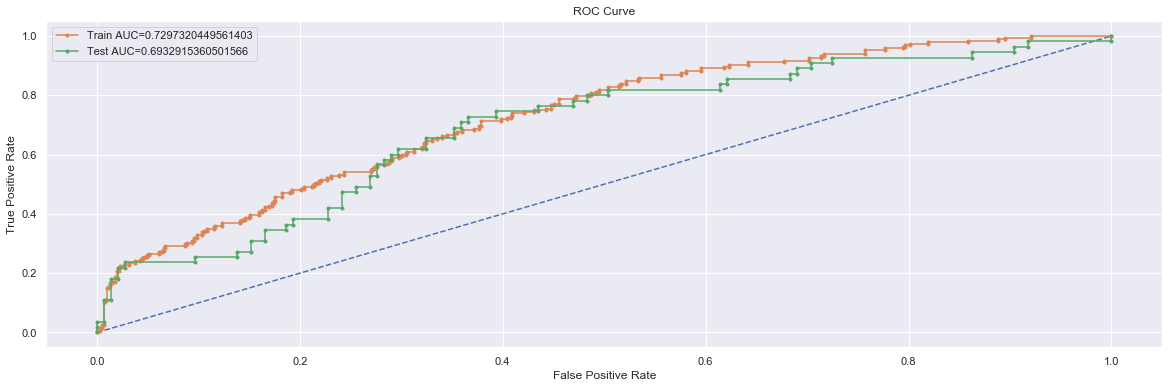

In [109]:
from sklearn.metrics import log_loss

model_LR = LogisticRegression(C=5, class_weight='balanced', n_jobs=-1)
model_LR.fit(train, y_train)
y_probs_train = model_LR.predict_proba(train)
y_probs_test = model_LR.predict_proba(test)
y_predicted_train = model_LR.predict(train)
y_predicted_test = model_LR.predict(test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)

from sklearn.metrics import f1_score
print("F1 Score Train: {}".format(f1_score(y_train,y_predicted_train)))
print("F1 Score Test: {}".format(f1_score(y_test,y_predicted_test)))
print('*'*50)

from sklearn.metrics import classification_report
print("classification_report of Train")
print(classification_report(y_train,y_predicted_train))
print("classification_report of Test")
print(classification_report(y_test,y_predicted_test))

print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['Logistic Regression'] = [test_auc, test_acc]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
from sklearn.metrics import roc_curve, auc
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC='+str(auc(test_fpr, test_tpr)))

plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

<h4> Train Confusion Matrix </h4>

Train confusion matrix
[[401 207]
 [ 65 127]]


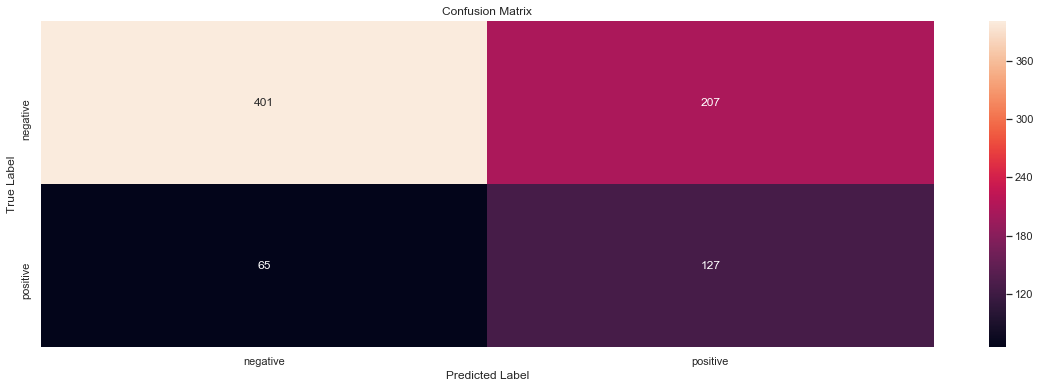

In [110]:
from sklearn.metrics import confusion_matrix  
print("Train confusion matrix")  
print(confusion_matrix(y_train,y_predicted_train))

cma=confusion_matrix(y_train, y_predicted_train) 
class_label = ["negative", "positive"] 
df_cm = pd.DataFrame(cma, index = class_label, columns = class_label) 
sns.heatmap(df_cm, annot = True, fmt = "d")
import seaborn as sns 
#class_label = ["negative", "positive"] 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted Label") 
plt.ylabel("True Label") 
plt.show() 

<h4> Test Confusion Matrix </h4>

Test confusion matrix
[[104  41]
 [ 23  32]]


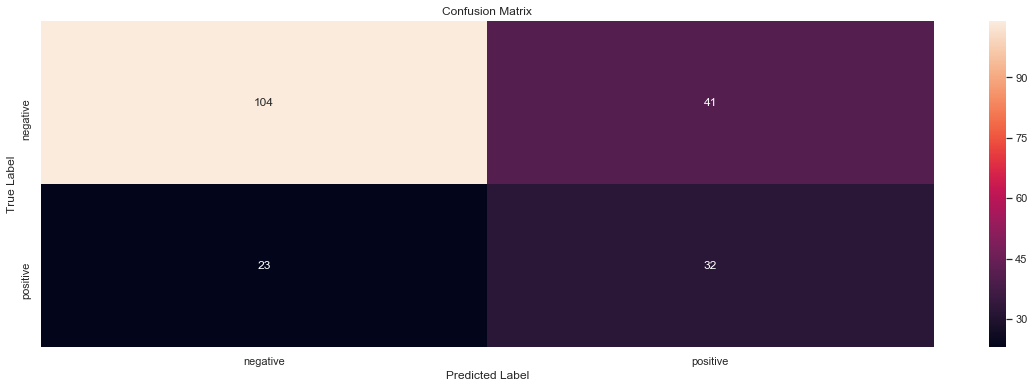

In [111]:
print("Test confusion matrix") 
print(confusion_matrix(y_test,y_predicted_test))

cma=confusion_matrix(y_test, y_predicted_test) 
class_label = ["negative", "positive"] 
df_cm = pd.DataFrame(cma, index = class_label, columns = class_label) 
sns.heatmap(df_cm, annot = True, fmt = "d")
import seaborn as sns 
#class_label = ["negative", "positive"] 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted Label") 
plt.ylabel("True Label") 
plt.show() 

<h3> Random Forest </h3>

<h4> Hyperparameter tuning Random Forest </h4>

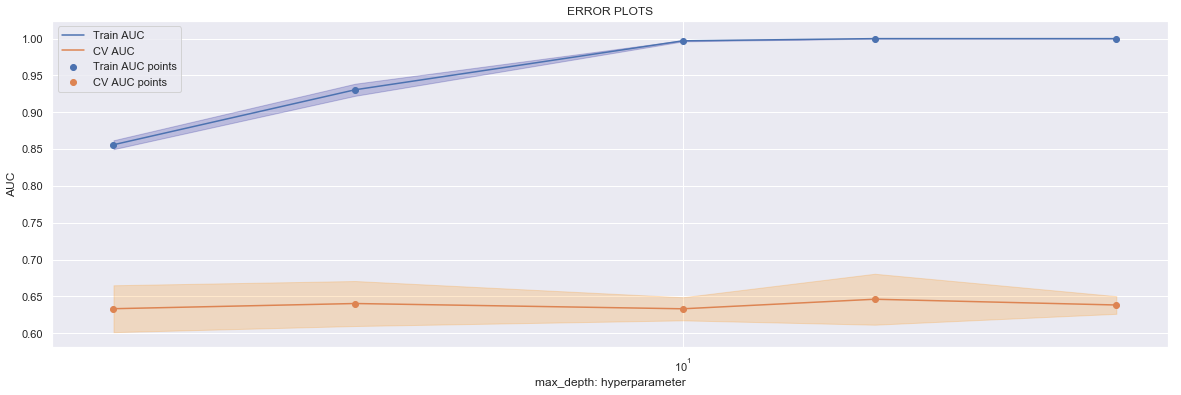

Best parameters:  {'max_depth': 15}


In [112]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
model_RF = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
max_depth= [3, 5, 10, 15, 25]
parameters = {'max_depth': [3, 5, 10, 15, 25]}

#clf_RF = RandomizedSearchCV(model_RF, param_distributions=params, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1, return_train_score=True)
clf_RF = GridSearchCV(model_RF, parameters, cv=3, scoring='roc_auc',n_jobs=-1,return_train_score=True)
clf_RF.fit(train, y_train)

train_auc= clf_RF.cv_results_['mean_train_score']
train_auc_std= clf_RF.cv_results_['std_train_score']
cv_auc = clf_RF.cv_results_['mean_test_score'] 
cv_auc_std= clf_RF.cv_results_['std_test_score']

plt.plot(max_depth, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(max_depth,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(max_depth, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(max_depth,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")

plt.scatter(max_depth, train_auc, label='Train AUC points')
plt.scatter(max_depth, cv_auc, label='CV AUC points')
plt.xscale('log')
plt.legend()
plt.show()
print('Best parameters:  {}'.format(clf_RF.best_params_))

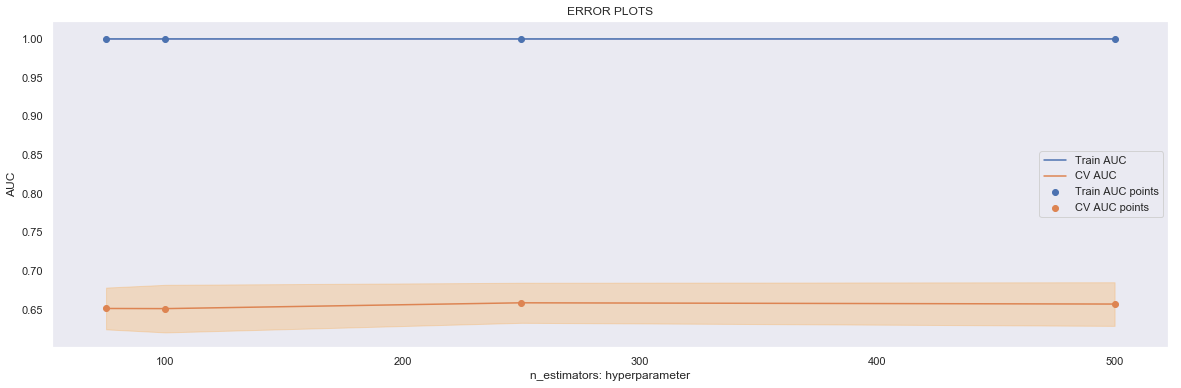

Best parameters:  {'n_estimators': 250}


In [113]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
parameters = {'n_estimators':[75, 100, 250, 500]} 
n_estimators=[75, 100, 250, 500]
model_RF=RandomForestClassifier(class_weight='balanced',max_depth=15,n_jobs=-1)

clf_RF = GridSearchCV(model_RF, parameters, cv=3, scoring='roc_auc',n_jobs=-1,return_train_score=True)
clf_RF.fit(train, y_train)

train_auc= clf_RF.cv_results_['mean_train_score']
train_auc_std= clf_RF.cv_results_['std_train_score']
cv_auc = clf_RF.cv_results_['mean_test_score'] 
cv_auc_std= clf_RF.cv_results_['std_test_score']

plt.plot(n_estimators, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(n_estimators,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(n_estimators, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(n_estimators,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("n_estimators: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")

plt.scatter(n_estimators, train_auc, label='Train AUC points')
plt.scatter(n_estimators, cv_auc, label='CV AUC points')
plt.legend()
plt.grid()
plt.show()
print('Best parameters:  {}'.format(clf_RF.best_params_))

<h4> Training random forest with best hyperparameters </h4>

F1 Score Train: 0.9099756690997567
F1 Score Test: 0.38636363636363635
**************************************************
classification_report of Train
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       608
           1       0.85      0.97      0.91       192

    accuracy                           0.95       800
   macro avg       0.92      0.96      0.94       800
weighted avg       0.96      0.95      0.95       800

classification_report of Test
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       145
           1       0.52      0.31      0.39        55

    accuracy                           0.73       200
   macro avg       0.64      0.60      0.61       200
weighted avg       0.70      0.73      0.71       200

**************************************************
Train AUC: 0.994
Test AUC: 0.711
**************************************************
Train Accuracy: 0.954
Test Ac

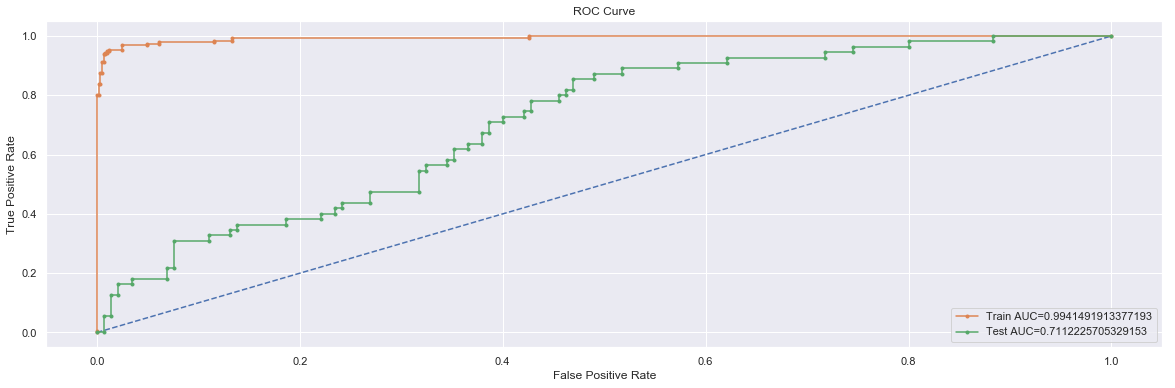

In [114]:
model_RF = RandomForestClassifier(n_estimators=250, max_depth=10, class_weight='balanced', n_jobs=-1)
model_RF.fit(train, y_train)
y_probs_train = model_RF.predict_proba(train)
y_probs_test = model_RF.predict_proba(test)
y_predicted_train = model_RF.predict(train)
y_predicted_test = model_RF.predict(test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)

from sklearn.metrics import f1_score
print("F1 Score Train: {}".format(f1_score(y_train,y_predicted_train)))
print("F1 Score Test: {}".format(f1_score(y_test,y_predicted_test)))
print('*'*50)

from sklearn.metrics import classification_report
print("classification_report of Train")
print(classification_report(y_train,y_predicted_train))
print("classification_report of Test")
print(classification_report(y_test,y_predicted_test))

print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['Random Forest'] = [test_auc, test_acc]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
from sklearn.metrics import roc_curve, auc
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC='+str(auc(test_fpr, test_tpr)))

plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


<h4> Train Confusion Matrix </h4>

Train confusion matrix
[[576  32]
 [  5 187]]


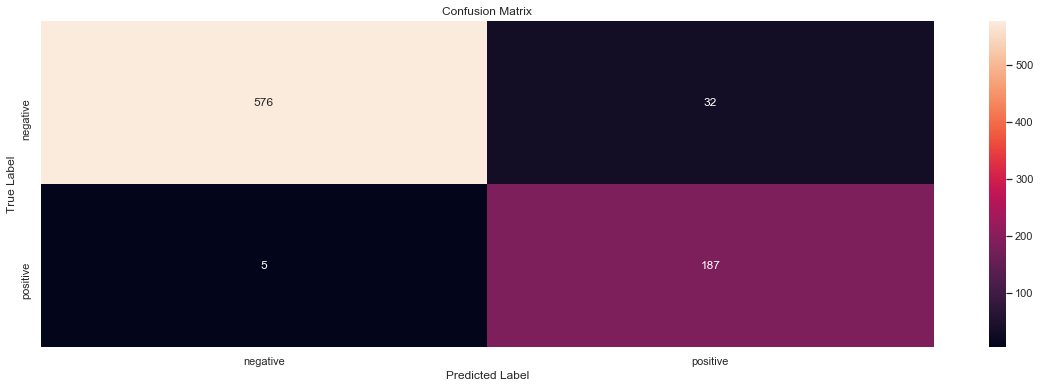

In [115]:
from sklearn.metrics import confusion_matrix  
print("Train confusion matrix")  
print(confusion_matrix(y_train, y_predicted_train))

cma=confusion_matrix(y_train, y_predicted_train) 

df_cm = pd.DataFrame(cma, index = class_label, columns = class_label) 
sns.heatmap(df_cm, annot = True, fmt = "d")
import seaborn as sns 
class_label = ["negative", "positive"] 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted Label") 
plt.ylabel("True Label") 
plt.show()

<h4> Test Confusion Matrix </h4>

Test confusion matrix
[[129  16]
 [ 38  17]]


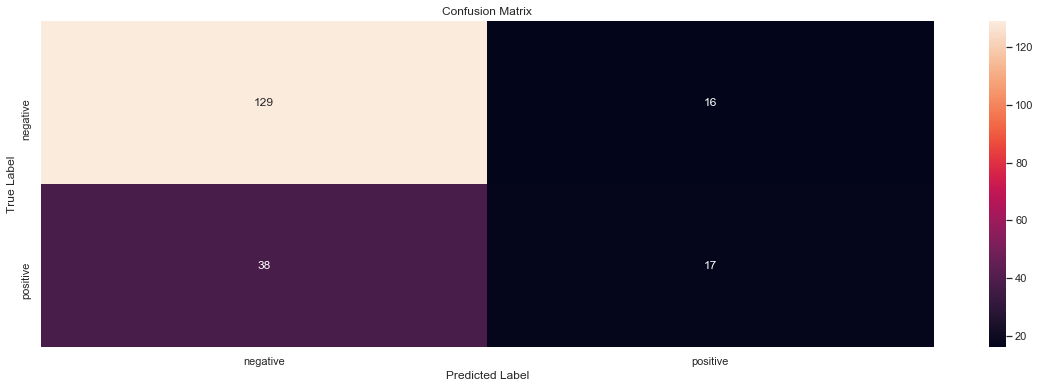

In [116]:
print("Test confusion matrix") 
print(confusion_matrix(y_test, y_predicted_test))

cma=confusion_matrix(y_test, y_predicted_test) 

df_cm = pd.DataFrame(cma, index = class_label, columns = class_label) 
sns.heatmap(df_cm, annot = True, fmt = "d")
import seaborn as sns 
class_label = ["negative", "positive"] 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted Label") 
plt.ylabel("True Label") 
plt.show()

<h3> XGBoost </h3>

<h4> Hyperparameter tuning XGBClassifier </h4>

[12:46:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:46:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:46:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in la

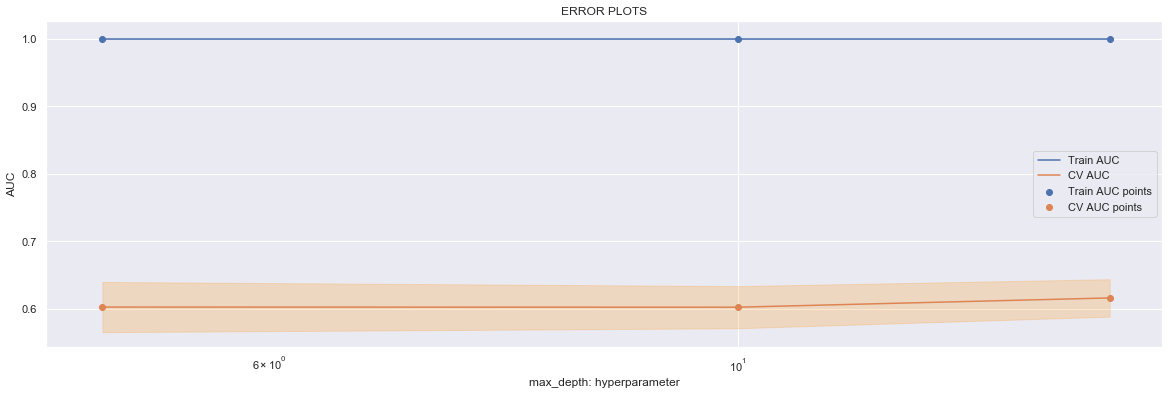

Best parameters:  {'max_depth': 15}


In [117]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
model_XGBoost =  XGBClassifier(class_weight='balanced', n_jobs=-1)
max_depth= [5, 10, 15]
parameters = {'max_depth': [5, 10, 15]}

clf_XGBoost = GridSearchCV(model_XGBoost, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf_XGBoost.fit(train, y_train)

train_auc= clf_XGBoost.cv_results_['mean_train_score']
train_auc_std= clf_XGBoost.cv_results_['std_train_score']
cv_auc = clf_XGBoost.cv_results_['mean_test_score'] 
cv_auc_std= clf_XGBoost.cv_results_['std_test_score']

plt.plot(max_depth, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(max_depth,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(max_depth, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(max_depth,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")

plt.scatter(max_depth, train_auc, label='Train AUC points')
plt.scatter(max_depth, cv_auc, label='CV AUC points')
plt.xscale('log')
plt.legend()
plt.show()
print('Best parameters:  {}'.format(clf_XGBoost .best_params_))

[12:41:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:41:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:41:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in la

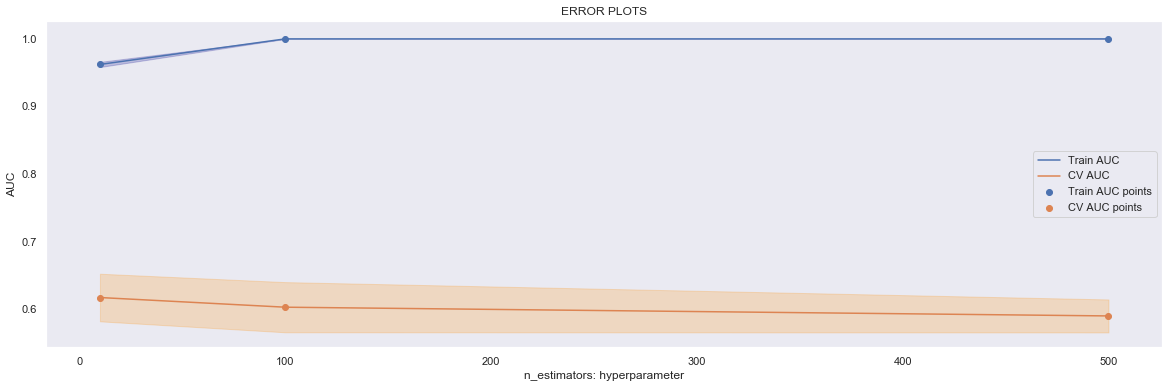

Best parameters:  {'n_estimators': 10}


In [94]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 100, 500]} 
n_estimators=[10, 100, 500]
model_XGBoost=XGBClassifier(random_state=0, class_weight='balanced',max_depth=5)


clf_XGBoost = GridSearchCV(model_XGBoost, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf_XGBoost.fit(train, y_train)

train_auc= clf_XGBoost.cv_results_['mean_train_score']
train_auc_std= clf_XGBoost.cv_results_['std_train_score']
cv_auc = clf_XGBoost.cv_results_['mean_test_score'] 
cv_auc_std= clf_XGBoost.cv_results_['std_test_score']

plt.plot(n_estimators, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(n_estimators,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(n_estimators, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(n_estimators,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("n_estimators: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")


plt.scatter(n_estimators, train_auc, label='Train AUC points')
plt.scatter(n_estimators, cv_auc, label='CV AUC points')
plt.legend()
plt.grid()
plt.show()
print('Best parameters:  {}'.format(clf_XGBoost .best_params_))

<h4> Training XGBClassifier with best hyperparameters </h4>

[12:46:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


F1 Score Train: 0.4921875
F1 Score Test: 0.2535211267605634
**************************************************
classification_report of Train
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       608
           1       0.98      0.33      0.49       192

    accuracy                           0.84       800
   macro avg       0.90      0.66      0.70       800
weighted avg       0.86      0.84      0.80       800

classification_report of Test
              precision    recall  f1-score   support

           0       0.75      0.95      0.84       145
  

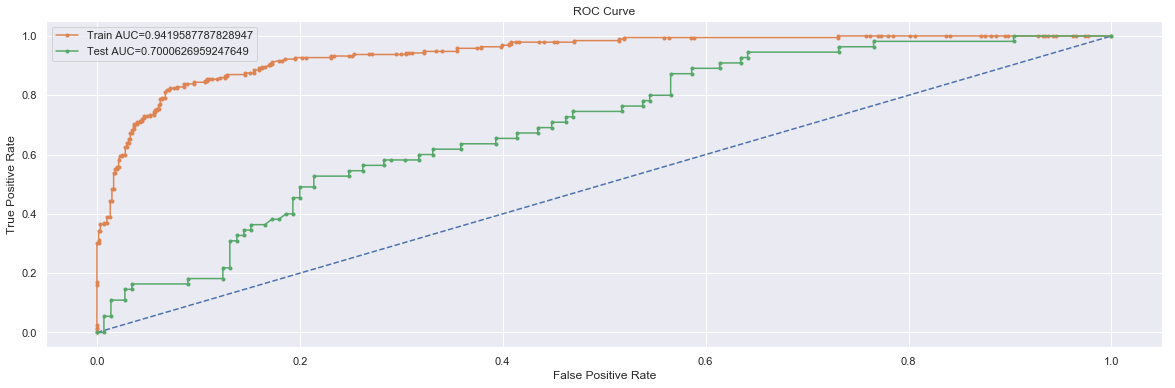

In [118]:
from xgboost import XGBClassifier

model_XGBoost = XGBClassifier(max_depth=5, n_estimators=10 ,class_weight='balanced', n_jobs=-1)
model_XGBoost.fit(train, y_train)
y_probs_train = model_XGBoost.predict_proba(train)
y_probs_test = model_XGBoost.predict_proba(test)
y_predicted_train = model_XGBoost.predict(train)
y_predicted_test = model_XGBoost.predict(test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)

from sklearn.metrics import f1_score
print("F1 Score Train: {}".format(f1_score(y_train,y_predicted_train)))
print("F1 Score Test: {}".format(f1_score(y_test,y_predicted_test)))
print('*'*50)

from sklearn.metrics import classification_report
print("classification_report of Train")
print(classification_report(y_train,y_predicted_train))
print("classification_report of Test")
print(classification_report(y_test,y_predicted_test))

print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['XGBoost'] = [test_auc, test_acc]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC='+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

<h4> Train Confusion Matrix </h4>

Train confusion matrix
[[607   1]
 [129  63]]


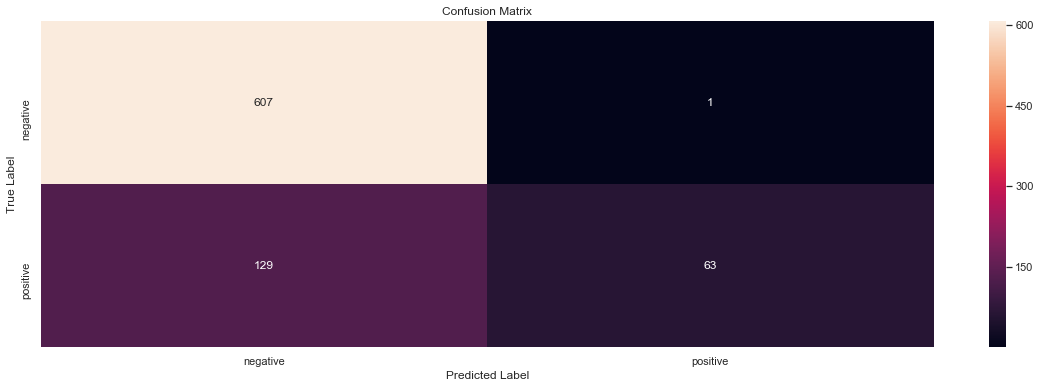

In [119]:
from sklearn.metrics import confusion_matrix  
print("Train confusion matrix")  
print(confusion_matrix(y_train, y_predicted_train))

cma=confusion_matrix(y_train, y_predicted_train) 

df_cm = pd.DataFrame(cma, index = class_label, columns = class_label) 
sns.heatmap(df_cm, annot = True, fmt = "d")
import seaborn as sns 
class_label = ["negative", "positive"] 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted Label") 
plt.ylabel("True Label") 
plt.show()

<h4> Test Confusion Matrix </h4>

Test confusion matrix
[[138   7]
 [ 46   9]]


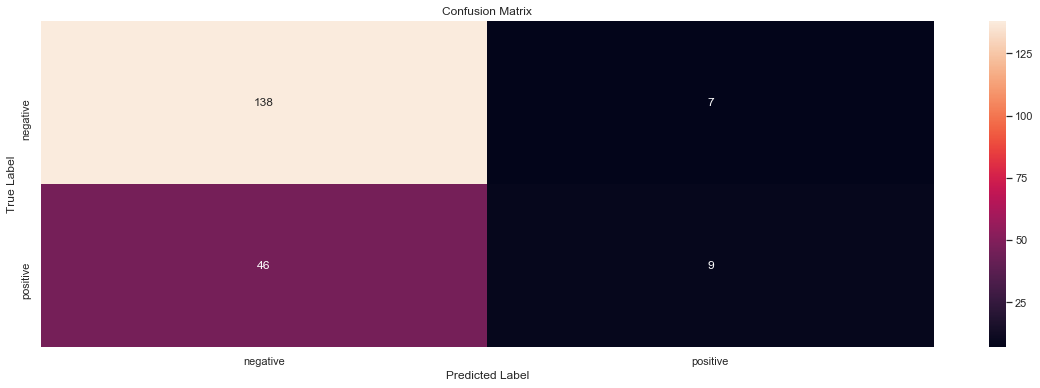

In [120]:
print("Test confusion matrix") 
print(confusion_matrix(y_test,y_predicted_test))

cma=confusion_matrix(y_test, y_predicted_test) 

df_cm = pd.DataFrame(cma, index = class_label, columns = class_label) 
sns.heatmap(df_cm, annot = True, fmt = "d")
import seaborn as sns 
class_label = ["negative", "positive"] 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted Label") 
plt.ylabel("True Label") 
plt.show()

<h2> Conclusion </h2>

In [121]:
print('*****  Comparison of different models  *****')
table = PrettyTable(['Model', 'Test AUC'])
for item in score.items():
    table.add_row([item[0], item[1][0]])
print(table)

*****  Comparison of different models  *****
+---------------------+--------------------+
|        Model        |      Test AUC      |
+---------------------+--------------------+
| Logistic Regression | 0.6932915360501566 |
|    Random Forest    | 0.7112225705329153 |
|       XGBoost       | 0.7000626959247649 |
+---------------------+--------------------+
